# Práctica 4
### Ánalisis Exploratorio de Datos

Cargamos librerías y el fichero de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,week_price,PETS Allowed,swimming pool
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,1043,no,0
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,1575,pets allowed,0
2,2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,1050,no,1
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,623,no,0
4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,560,no,0


### Análisis descriptivo

In [2]:
df.shape

(48895, 20)

El dataset tiene 48895 filas y 20 columnas.

Vemos las columnas que tiene y sus nombres

In [3]:
df.columns

Index(['Unnamed: 0', 'id', 'name', 'host_id', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'week_price', 'PETS Allowed', 'swimming pool'],
      dtype='object')

Homogeneizamos los nombres de las columnas, poniendo en minúsculas y separados por guiones bajos las columnas:
`Unnamed: 0`, `PETS Allowed`, `swimming pool`

In [4]:
df.rename(columns={'Unnamed: 0':    'unnamed_0',
                   'PETS Allowed':  'pets_allowed', 
                   'swimming pool': 'swimming_pool'},
                   inplace=True)
df.columns

Index(['unnamed_0', 'id', 'name', 'host_id', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'week_price', 'pets_allowed', 'swimming_pool'],
      dtype='object')

Vemos la información del dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   unnamed_0                       48895 non-null  int64  
 1   id                              48895 non-null  int64  
 2   name                            48879 non-null  object 
 3   host_id                         48895 non-null  int64  
 4   host_name                       48874 non-null  object 
 5   neighbourhood_group             48895 non-null  object 
 6   neighbourhood                   48895 non-null  object 
 7   latitude                        48895 non-null  float64
 8   longitude                       48895 non-null  float64
 9   room_type                       48895 non-null  object 
 10  price                           48895 non-null  object 
 11  minimum_nights                  48895 non-null  int64  
 12  number_of_reviews               

Tenemos nulos en los campos: `name`, `host_name`, `last_review`, `reviews_per_month` 

El campo `price` y `week_price` es Object, cuando un precio debería ser numérico.

Como primera aproximación, estos son algunos de los que campos tendrán que estudiarse y tratarse en caso necesario.

Vemos los primeros datos traspuestos

In [6]:
df.head().T

,0,1,2,3,4
unnamed_0,0,1,2,3,4
id,2539,2595,3647,3831,5022
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt


Mostramos los datos estadísticos de las columnas númericas

In [7]:
df.describe()

,unnamed_0,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,24447.000000,1.901714e+07,6.762001e+07,40.728949,-73.952170,7.028715,23.274466,1.373221,8.127927,112.927150
std,14114.915043,1.098311e+07,7.861097e+07,0.054530,0.046157,20.510577,44.550582,1.680442,41.913868,131.814178
min,0.000000,2.539000e+03,2.438000e+03,40.499790,-74.244420,-5.000000,0.000000,0.010000,1.000000,0.000000
25%,12223.500000,9.471945e+06,7.822033e+06,40.690100,-73.983070,1.000000,1.000000,0.190000,1.000000,0.000000
50%,24447.000000,1.967728e+07,3.079382e+07,40.723070,-73.955680,3.000000,5.000000,0.720000,1.000000,45.000000
75%,36670.500000,2.915218e+07,1.074344e+08,40.763115,-73.936275,5.000000,24.000000,2.020000,2.000000,227.000000
max,48894.000000,3.648724e+07,2.743213e+08,40.913060,-73.712990,1250.000000,629.000000,58.500000,987.000000,556.000000


Veamos gráficamente sus distribuciones en histogramas

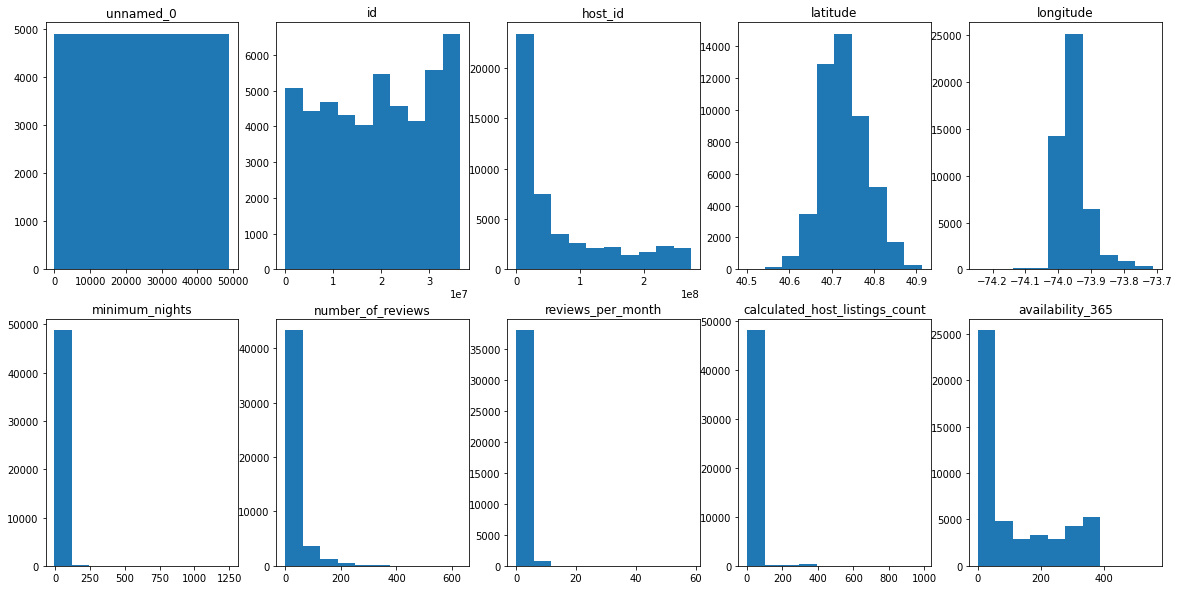

In [8]:
columnas = df.select_dtypes(exclude='object').columns
num_col = len(columnas)

from math import ceil
numero_columnas_plot = 5
numero_filas_plot = ceil(num_col/numero_columnas_plot)

fig = plt.figure(figsize=(20, 10))

for col,i in zip(columnas,range(num_col)):
    ax = fig.add_subplot(numero_filas_plot, numero_columnas_plot, i+1)
    plt.hist(df[col])
    plt.title(col)
plt.show()

`unnamed_0` tiene una distribución uniforme, con valores que seguramente sean iguales al índice del dataset.<br>
`id` y `host_id` son códigos de identificación de la aplicación, por lo que aún siendo uniformes o con valores predominantes, sus valores pueden considerarse como etiquetas y no tendrán carácter estadístico.<br>
`latitude` y `longitud`, tienen una forma de 'distribución normal', ya que los datos pertenecen a la ciudad de Nueva York, por lo que están muy cercanos estos valores y muy localizados.<br>
El resto de columnas, tienen un valor muy alto en los valores cercanos al mínimo, decayendo conforme nos movemos hacía los valores máximos, en algunos casos, incluso siendo prácticamente inapreciables.

### Tipos de variables

In [9]:
df.dtypes

unnamed_0                           int64
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                              object
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
week_price                         object
pets_allowed                       object
swimming_pool                      object
dtype: object

Cambiamos el tipo de dato de price y week_price a numerico

In [10]:
#df['price'] = pd.to_numeric(df['price'])
# Si intentamos convertir directamente la columna, da error por tener valores '-'
df[df['price'] < '0']

,unnamed_0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,week_price,pets_allowed,swimming_pool
207,207,54626,Cozy bedroom by Yankee Stadium,190409,Waundell,Bronx,Highbridge,40.83075,-73.93058,Private room,-,1,138,2019-06-30,1.45,3,323,-,no,0
421,421,142069,"EAST VILLAGE STUDIO, sunny & quiet",277747,Josh,Manhattan,East Village,40.72485,-73.97813,Entire home/apt,-,4,22,2014-11-10,0.23,1,0,-,no,0
776,776,278145,Large Room in a Huge NY apartment.,1452026,Heidi,Queens,Astoria,40.77117,-73.91905,Private room,-,5,3,2017-06-20,0.03,1,0,-,no,0
854,854,299699,Sunny apartment in Greenpoint,1557998,Eliza,Brooklyn,Greenpoint,40.72582,-73.95843,Entire home/apt,-,4,9,2018-04-02,0.10,1,188,-,no,1
1100,1100,466277,"W'burg 2 bedroom w/ yard & laundry, 5 mins to L",815977,Ryan,Brooklyn,Williamsburg,40.71110,-73.94643,Entire home/apt,-,3,108,2019-07-02,1.25,2,144,-,yes,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46905,46905,35484662,Cozy bedroom in Astoria next to subway,243367528,Lucca & Paula,Queens,Astoria,40.76599,-73.91225,Private room,-,1,9,2019-07-01,9.00,7,253,-,pets allowed,-
47004,47004,35540762,驿站,239139334,Fang,Queens,Bayside,40.76883,-73.78707,Private room,-,1,4,2019-07-08,4.00,3,345,-,no,0
47245,47245,35653043,"Steps from Central Park, private bdrm, 2 full ...",93533725,Christine,Manhattan,Midtown,40.76465,-73.98155,Private room,-,2,0,NaN,NaN,1,38,-,we love pets,0
47632,47632,35839810,Private Bedroom in Bushwick Townhouse,6237789,Pierrick,Brooklyn,Bushwick,40.69209,-73.91882,Private room,-,7,1,2019-06-29,1.00,1,18,-,no,0


Convertimos la columna `price` a numérica, con los valores extraños a NaN

In [11]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

Hacemos lo mismo con la columna `week_price`

In [12]:
df['week_price'] = pd.to_numeric(df['week_price'], errors='coerce')

Revisamos la columna `pets_allowed`

In [13]:
df['pets_allowed'].value_counts()

no              28579
yes              8157
pets allowed     4084
never            4042
we love pets     4033
Name: pets_allowed, dtype: int64

La columna, por su propio nombre, debería ser booleana, y por tanto solo contener valores 0 y 1, siendo también numérica y no object

Convertimos los valores `yes`, `pets allowed` y `we love pets` a 1 y los valores `no` y `never` a 0

In [14]:
pets = {'yes':1, 
        'pets allowed':1,
        'we love pets':1,
        'no':0,
        'never':0}
df.replace(pets, inplace=True)

La columna `swimming_pool` tambien es de tipo object, cuando también podría contener solo valores 0 y 1

In [15]:
df['swimming_pool'].value_counts()

0    35960
1     9696
-     3239
Name: swimming_pool, dtype: int64

Reemplazamos los valores `-` por 0 y convertimos a numérica la columna `swimming_pool`

In [16]:
df['swimming_pool'].replace('-', 0, inplace=True)
df['swimming_pool'] = pd.to_numeric(df['swimming_pool'])

`room_type` es otra columna a estudiar

In [17]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

Esta columna puede ser convertida a valores numéricos, ya que solo tiene 3 posibles opciones.

Convertiremos las columnas a valores 0, 1 y 2, teniendo en cuenta el número total de apariciones de menor a mayor.

In [18]:
tipo_habitacion = {'Shared room':0, 
                   'Private room':1, 
                   'Entire home/apt':2}
df.replace(tipo_habitacion, inplace=True)

Estudiemos `neighbourhood_group`

In [19]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

Podemos cambiar los nombres de los distritos por números al igual que en la columna anterior de tipo de habitación.

In [20]:
tipo_habitacion = {'Staten Island':0, 
                   'Bronx':1, 
                   'Queens':2,
                   'Brooklyn':3,
                   'Manhattan':4}
df.replace(tipo_habitacion, inplace=True)

Veamos si alguna otra columna puede ser convertida a númerico

In [21]:
df.dtypes

unnamed_0                           int64
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                 int64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                           int64
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
week_price                        float64
pets_allowed                        int64
swimming_pool                       int64
dtype: object

Las columnas que quedan, no tiene sentido que sean convertidas.<br>
`name` es sustituible por la columna `id` <br>
`host_name` es similar a la anterior pero con la columna `host_id`<br>
`neighbourhood` tiene demasiados valores para ser convertida (221 posibles valores)<br>
y `last_review` es una fecha.

### Datos ausentes

Veamos que columnas tienen nulos y en que cantidad se encuentran

In [22]:
df.isna().sum()

unnamed_0                             0
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                               123
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
week_price                          123
pets_allowed                          0
swimming_pool                         0
dtype: int64

Las primeras columnas con nulos son `name` y `host_name`.

Veamos los datos nulos de `name`

In [23]:
df[ df['name'].isna() ].head()

,unnamed_0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,week_price,pets_allowed,swimming_pool
2854,2854,1615764,NaN,6676776,Peter,4,Battery Park City,40.71239,-74.01620,2,400.0,1000,0,NaN,NaN,1,362,2800.0,1,1
3703,3703,2232600,NaN,11395220,Anna,4,East Village,40.73215,-73.98821,2,200.0,1,28,2015-06-08,0.45,1,341,1400.0,0,0
5775,5775,4209595,NaN,20700823,Jesse,4,Greenwich Village,40.73473,-73.99244,2,225.0,1,1,2015-01-01,0.02,1,0,1575.0,0,0
5975,5975,4370230,NaN,22686810,Michaël,4,Nolita,40.72046,-73.99550,2,215.0,7,5,2016-01-02,0.09,1,0,1505.0,0,1
6269,6269,4581788,NaN,21600904,Lucie,3,Williamsburg,40.71370,-73.94378,1,150.0,1,0,NaN,NaN,1,0,1050.0,0,1


Puesto que es un campo descriptivo de la columna `id`, podemos usar el valor de `id` para rellenar el campo `name`

In [24]:
df['name'].update( df[df['name'].isna()]['id'].astype(dtype='object') )
df.iloc[2854]

unnamed_0                                      2854
id                                          1615764
name                                        1615764
host_id                                     6676776
host_name                                     Peter
neighbourhood_group                               4
neighbourhood                     Battery Park City
latitude                                   40.71239
longitude                                  -74.0162
room_type                                         2
price                                         400.0
minimum_nights                                 1000
number_of_reviews                                 0
last_review                                     NaN
reviews_per_month                               NaN
calculated_host_listings_count                    1
availability_365                                362
week_price                                   2800.0
pets_allowed                                      1
swimming_poo

Procedemos igualmente para `host_name` con `host_id`

In [25]:
df[ df['host_name'].isna() ].head()

,unnamed_0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,week_price,pets_allowed,swimming_pool
360,360,100184,Bienvenue,526653,NaN,2,Queens Village,40.72413,-73.76133,1,50.0,1,43,2019-07-08,0.45,1,88,350.0,1,0
2700,2700,1449546,Cozy Studio in Flatbush,7779204,NaN,3,Flatbush,40.64965,-73.96154,2,100.0,30,49,2017-01-02,0.69,1,342,700.0,1,0
5745,5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,4,Harlem,40.80606,-73.95061,1,86.0,3,34,2019-05-23,1.00,1,359,602.0,1,0
6075,6075,4446862,Charming Room in Prospect Heights!,23077718,NaN,3,Crown Heights,40.67512,-73.96146,1,50.0,1,0,NaN,NaN,1,0,350.0,0,0
6582,6582,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,3,Greenpoint,40.72035,-73.95355,2,195.0,1,1,2015-10-20,0.02,1,0,1365.0,0,0


In [26]:
df['host_name'].update( df[df['host_name'].isna()]['host_id'].astype(dtype='object') )
df.iloc[360]

unnamed_0                                    360
id                                        100184
name                                   Bienvenue
host_id                                   526653
host_name                                 526653
neighbourhood_group                            2
neighbourhood                     Queens Village
latitude                                40.72413
longitude                              -73.76133
room_type                                      1
price                                       50.0
minimum_nights                                 1
number_of_reviews                             43
last_review                           2019-07-08
reviews_per_month                           0.45
calculated_host_listings_count                 1
availability_365                              88
week_price                                 350.0
pets_allowed                                   1
swimming_pool                                  0
Name: 360, dtype: ob

Veamos ahora `last_review` y `reviews_per_month`.<br>
Al ser más del 20% del dataset, estudiaremos que hacer con ellos, ya que la opción fácil sería borrarlos, pero podría afectar al uso posterior del dataset.<br>
Primero veamos si coinciden las columnas nulas.

In [27]:
filtro_review_nulo = df['last_review'].isna()
df[filtro_review_nulo][['last_review','reviews_per_month']].value_counts()

Series([], dtype: int64)

Los nulos de ambas columnas se producen en los mismos registros.<br>

Si un registro no tiene *review* evidentemente no puede realizarse una media por meses en `reviews_per_month`. Esto puede suplirse poniendo esos valores nulos a Cero.<br>
Comprobamos que el valor de la columna `number_of_reviews` es cero para `reviews_per_month` nulos.

In [28]:
df[ df['number_of_reviews'] == 0 ][['number_of_reviews','reviews_per_month']]

,number_of_reviews,reviews_per_month
2,0,NaN
19,0,NaN
26,0,NaN
36,0,NaN
38,0,NaN
...,...,...
48890,0,NaN
48891,0,NaN
48892,0,NaN
48893,0,NaN


Tenemos un total de 10.052 filas que coinciden con el número de nulos.<br>
Podemos poner la columna `reviews_per_month` con valores cero, para que concuerden las columnas.

In [29]:
df['reviews_per_month'].fillna(0,inplace=True)

Sigamos con `last_review`<br>
Esta columna es la última fecha en la que se hizo una reseña, si está vacía es que nunca ha tenido reseña por lo que puede ser borrado.<br>
Eliminemos las filas vacías.

In [30]:
df['last_review'].dropna(inplace=True)

Una vez sin nulos, convertimos el campo a tipo Fecha.

In [31]:
df['last_review'] = pd.to_datetime(df['last_review'])

Pasamos a las columnas `price` y `week_price`.<br>
Estas tienen 123 nulos.

Veamos si coinciden los valores nulos de ambas columnas.

In [32]:
df[df['price'].isna()][['price','week_price']]

,price,week_price
207,NaN,NaN
421,NaN,NaN
776,NaN,NaN
854,NaN,NaN
1100,NaN,NaN
...,...,...
46905,NaN,NaN
47004,NaN,NaN
47245,NaN,NaN
47632,NaN,NaN


Comprobemos con la función `value_counts`

In [33]:
df[df['price'].isna()][['price','week_price']].value_counts()

Series([], dtype: int64)

Al devolver una Serie vacía, nos indica que tanto los valores nulos de `price` y `week_price` pertenecen a los mismos registros.

Vamos a borrar los registros, ya que al ser pocos respecto al total, su influencia en el dataset no será grande.

In [34]:
df.dropna(inplace=True)

Comprobamos que las 48895 filas iniciales se han reducido.

In [35]:
df.shape

(38740, 20)

Hasta aquí, hemos revisado los datos de forma genérica, sin tener en cuenta si tendrían o no relevancia posterior.<br>
¿Podemos eliminar columnas de nuestro dataset?
Seguramente si, veamos cuales.

En primer lugar, veamos que columnas quedan que no son numéricas.

In [36]:
col_no_num = [col for col in df.columns if str(df[col].dtype) in ('object','datetime64[ns]') ]
col_no_num

['name', 'host_name', 'neighbourhood', 'last_review']

Las 3 primeras columnas puede ser borradas, ya que tienen valores demasiado atomizados o únicos. 

In [37]:
col_object = [col for col in df.columns if df[col].dtype == 'object']
df.drop(col_object, axis=1, inplace=True)

Por esta misma razón, aunque sean númericas, las columnas `id` y `host_id` también son borradas.

In [38]:
df.drop(['id', 'host_id'], axis=1, inplace=True)

Para la columna fecha, `last_review`, podemos pasarla a númerica tomando solo el año de la review.

In [39]:
df['last_review'] = df['last_review'].dt.year.astype('Int64')

Para terminar este punto, podemos también eliminar la columna `unnamed_0`, ya que contiene la misma información que el índice del dataset.

In [40]:
df.drop(['unnamed_0'], axis=1, inplace=True)

Verificamos que todas las columnas son numéricas.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38740 entries, 0 to 48852
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             38740 non-null  int64  
 1   latitude                        38740 non-null  float64
 2   longitude                       38740 non-null  float64
 3   room_type                       38740 non-null  int64  
 4   price                           38740 non-null  float64
 5   minimum_nights                  38740 non-null  int64  
 6   number_of_reviews               38740 non-null  int64  
 7   last_review                     38740 non-null  Int64  
 8   reviews_per_month               38740 non-null  float64
 9   calculated_host_listings_count  38740 non-null  int64  
 10  availability_365                38740 non-null  int64  
 11  week_price                      38740 non-null  float64
 12  pets_allowed                    

### Datos atípicos

Veamos si tenemos filas duplicadas

In [42]:
df.duplicated().any()

False

No tenemos duplicados.

Comprobemos los outliers.

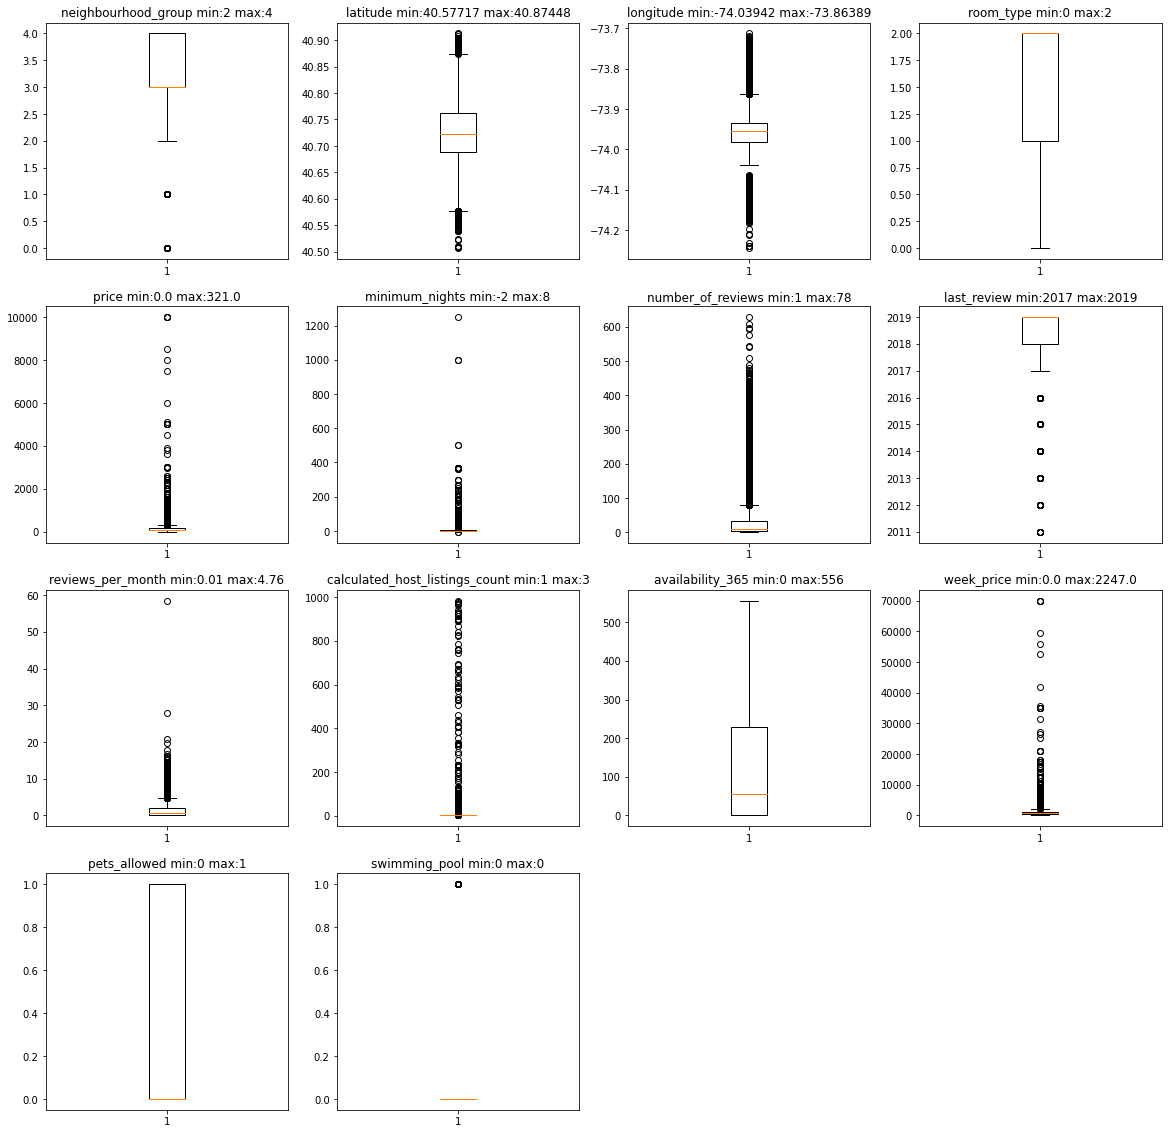

In [43]:
columnas = df.select_dtypes(exclude=['object','datetime64']).columns
num_col = len(columnas)

from math import ceil
numero_columnas_plot = 4
numero_filas_plot = ceil(num_col/numero_columnas_plot)

fig = plt.figure(figsize=(20, 5*numero_filas_plot))

for col,i in zip(columnas,range(num_col)):
    ax = fig.add_subplot(numero_filas_plot, numero_columnas_plot, i+1)
    bx = plt.boxplot(df[col])
    try:
        titulo = col+' min:'+str(bx['caps'][0].get_ydata()[0])+' max:'+str(bx['caps'][1].get_ydata()[0])
    except:
        titulo = col
    plt.title(titulo)
plt.show()

Tras ver los datos de forma gráfica, determinamos que las columnas relativas a los distritos y la ubicación del alojamiento (`neighbourhood_group`, `latitude`, `longitude`) son valores cercanos a la media, por lo que podrán normalizarse.<br>
La columna `swimming_pool` tampoco será tratada por ser un booleano, que da un punto de información extra.
Las columnas relativas al precio (`price`, `week_price`) y las reviews (`number_of_reviews`, `last_review`, `reviews_per_month`) serán estudiadas de forma individualizada, al igual que la columna de las veces que ha sido listado el alojamiento (`calculated_host_listings_count`).<br>

Ahora nos centraremos en la columna `minimum_nights` ya que además de outliers, tiene valores sin sentido en el contexto de alojamientos, puesto que aparecen valores negativos, cuando el valor lógico para el mínimo tendría que ser `1`.
 

In [44]:
menores_a_uno = df['minimum_nights'] < 1
df['minimum_nights'][menores_a_uno].value_counts()

-1    2
-4    1
-5    1
-2    1
Name: minimum_nights, dtype: int64

Los tomamos como valores erróneos y procedemos a borrarlos.

In [45]:
df.drop(df['minimum_nights'][menores_a_uno].index, axis=0, inplace=True)

Del mismo modo que la columna anterior, la columna `availability_365` no tiene sentido que tenga disponible el alojamiento en el año anterior más de 365 días.<br>
Procedemos a borrarlos.

In [46]:
filtro_365 = df['availability_365'] > 365
print('Filas a borrar:', df['availability_365'][filtro_365].count())
df.drop(df['availability_365'][filtro_365].index, axis=0, inplace=True)

Filas a borrar: 15


Siguiendo con outliers mínimos, continuamos con `last_review` que tiene valores inferiores a 2017 como outliers.<br>
Vamos a borrarlos, ya que las reseñas antiguas nos indican que el dato puede estar desactualizado u obsoleto.

In [47]:
df.drop(df[df['last_review'] < 2017].index, axis=0, inplace=True)

Tras los borrados, veamos como se encuentran las columnas que estamos estudiando.

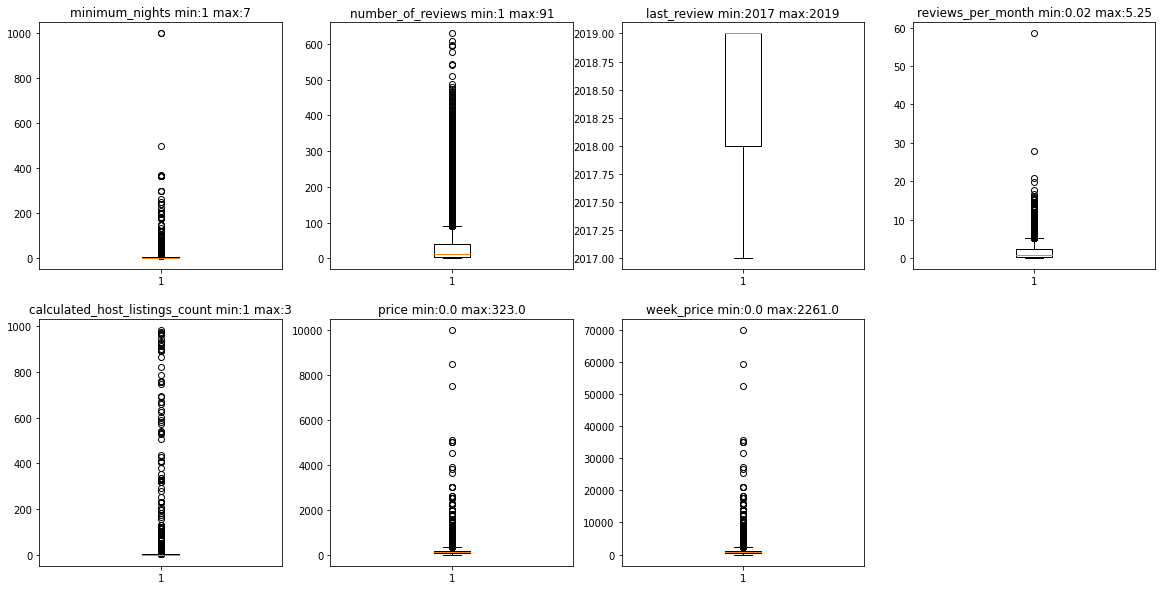

In [48]:
col_estudio = ['minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count', 'price', 'week_price']
num_col = len(col_estudio)

from math import ceil
numero_columnas_plot = 4
numero_filas_plot = ceil(num_col/numero_columnas_plot)

fig = plt.figure(figsize=(20, 5*numero_filas_plot))

for col,i in zip(col_estudio,range(num_col)):
    ax = fig.add_subplot(numero_filas_plot, numero_columnas_plot, i+1)
    bx = plt.boxplot(df[col])
    try:
        titulo = col+' min:'+str(bx['caps'][0].get_ydata()[0])+' max:'+str(bx['caps'][1].get_ydata()[0])
    except:
        titulo = col
    plt.title(titulo)
plt.show()

Tras visualizar las gráficas, optamos por realizar una normalización de recorte, pero solo a valores muy extremos, y así después aplicar una normalización z-score.

Para la columna `minimum_nights` eliminamos los valores superiores a 30, ya que a partir de este valor se puede considerar que es un alojamiento de larga duración, cuando la aplicación está desarrollada para un uso más temporal.

In [49]:
filtro_noches = df['minimum_nights'] > 30
print('Filas a borrar:', df['minimum_nights'][filtro_noches].count())
df.drop(df['minimum_nights'][filtro_noches].index, axis=0, inplace=True)

Filas a borrar: 362


Para la columna `number_of_reviews` eliminamos los valores superiores a 250.

In [50]:
filtro_review = df['number_of_reviews'] > 250
print('Filas a borrar:', df['number_of_reviews'][filtro_review].count())
df.drop(df['number_of_reviews'][filtro_review].index, axis=0, inplace=True)

Filas a borrar: 261


Para la columna `calculated_host_listings_count` eliminamos los valores superiores a 60, ya lo habitual es que se vean de 1 a 3 veces.

In [51]:
filtro_lista = df['calculated_host_listings_count'] > 60
print('Filas a borrar:', df['calculated_host_listings_count'][filtro_lista].count())
df.drop(df['calculated_host_listings_count'][filtro_lista].index, axis=0, inplace=True)

Filas a borrar: 583


Para la columna `price` eliminamos los valores superiores a 500, ya que pasa a ser un precio muy elevado al estar el tope máximo del outlier a partir de los 323.

In [52]:
filtro_price = df['price'] > 500
print('Filas a borrar:', df['price'][filtro_price].count())
df.drop(df['price'][filtro_price].index, axis=0, inplace=True)

Filas a borrar: 531


Una vez recortados los valores máximos fuera del rango, procedemos a aplicarles z-score.<br>
Se ha intentado realizar para todos los valores, pero tarda mucho, así que solo como ejemplo se va a realizar para la columna `minimum_nights` el paso a z-score.

In [53]:
from scipy.stats import zscore
df_zscore = df[['minimum_nights']].apply(zscore)

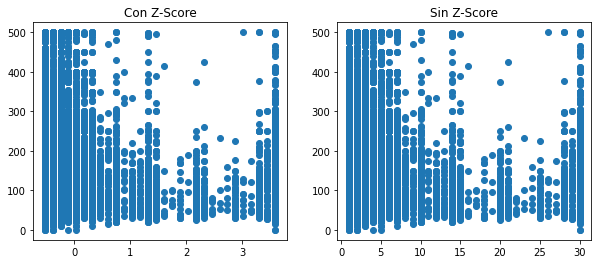

In [54]:
fig = plt.figure(figsize=(10, 4))
fig.add_subplot(1, 2, 1)
plt.scatter(df_zscore,df['price'])
plt.title('Con Z-Score')
fig.add_subplot(1, 2, 2)
plt.scatter(df['minimum_nights'],df['price'])
plt.title('Sin Z-Score')
plt.show()

En la gráfica vemos que los valores tanto originales como los que se han convertido solo cambian en la escala cuando los comparamos con `price`.

### Correlación

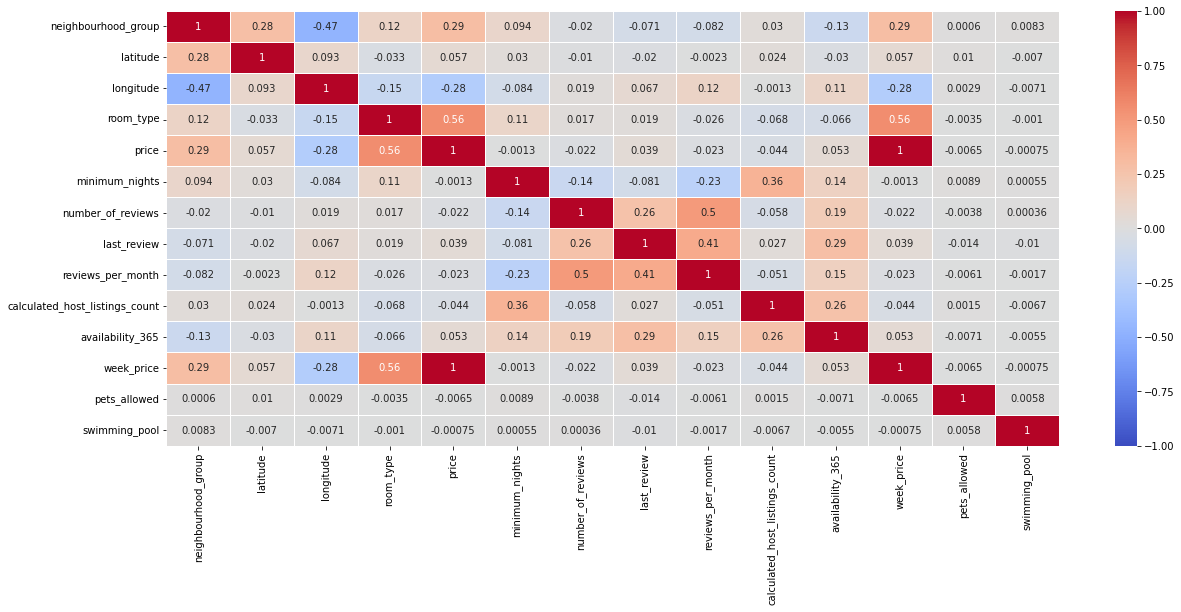

In [55]:
corr = df.corr()

plt.figure(figsize=(20,8))

sns.heatmap(corr, 
            cmap='coolwarm',
            linewidths=0.5,
            linecolor='white',
            annot=True,
            vmin=-1)

plt.show()

Vemos que los únicos valores con una alta correlación son `price` y `week_price` con un 1 (correlación total), ya que el segundo valor es el primero múltiplicado por 7. Por tanto, `week_price` puede ser borrada, ya que no nos aporta valor a los datos.<br>
Del resto, no existe ninguna otra correlación alta, ya que el siguiente valor sería 0.56 entre `room_type` y `price`, y no serían descartables.<br><br>
Borramos la columna `week_price`

In [56]:
df.drop(['week_price'], axis=1, inplace=True)

In [57]:
df.shape

(32618, 13)

### Conclusiones
El dataset al comenzar tenía 48895 filas y 20 columnas, ahora lo hemos dejado en 32618 filas y 13 columnas, todas númericas y preparadas para realizar tareas de entrenamiento.<br>
Una vez que ya conocemos el dataset, en caso de tener que volver a preparar los datos, por ejemplo porque estos no se adapten bien a las técnicas de ML con buenos resultados, podríamos cambiar el orden de algunos pasos, como los borrados de columnas, que hemos realizado hasta en el último paso. De este modo reduciríamos el tratamiento de los datos solo a las 13 columnas que hemos dejado y modificando lo necesario, por ejemplo, realizando otros tratamientos en las columnas con outliers.